In [7]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy

In [8]:
#pip install --upgrade numpy

In [46]:
df = pd.read_csv('pokemon.csv')

In [47]:
#! /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install scikit-learn


In [48]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [49]:
df = df.drop(df.columns[[0]], axis=1) 
df = df.drop(df.columns[[0]], axis=1) 

In [50]:
len(df.Type_1.unique())

18

In [51]:
df.isnull().sum()

Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [52]:
530/721*100 # Egg-Group-2

73.50901525658807

I will drop the column Egg_Group_2 since there is more than 40% of the values missing

In [53]:
df = df.drop(['Egg_Group_2'], axis=1)

In [54]:
df.isnull().sum()

Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [55]:
371/721*100 # Type-2

51.45631067961165

I will drop the column Type_2 since there is more than 40% of the values missing

In [56]:
df = df.drop(['Type_2'], axis=1)

In [57]:
df.isnull().sum()

Type_1               0
Total                0
HP                   0
Attack               0
Defense              0
Sp_Atk               0
Sp_Def               0
Speed                0
Generation           0
isLegendary          0
Color                0
hasGender            0
Pr_Male             77
Egg_Group_1          0
hasMegaEvolution     0
Height_m             0
Weight_kg            0
Catch_Rate           0
Body_Style           0
dtype: int64

In [58]:
df.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [59]:
df.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Grass,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,False,0.71,6.9,45,quadruped
1,Grass,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,False,0.99,13.0,45,quadruped
2,Grass,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,True,2.01,100.0,45,quadruped
3,Fire,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,False,0.61,8.5,45,bipedal_tailed
4,Fire,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,False,1.09,19.0,45,bipedal_tailed


In [60]:
df[['isLegendary', 'hasMegaEvolution','hasGender']]=df[['isLegendary', 'hasMegaEvolution','hasGender']].astype('int')

In [61]:
df.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Grass,318,45,49,49,65,65,45,1,0,Green,1,0.875,Monster,0,0.71,6.9,45,quadruped
1,Grass,405,60,62,63,80,80,60,1,0,Green,1,0.875,Monster,0,0.99,13.0,45,quadruped
2,Grass,525,80,82,83,100,100,80,1,0,Green,1,0.875,Monster,1,2.01,100.0,45,quadruped
3,Fire,309,39,52,43,60,50,65,1,0,Red,1,0.875,Monster,0,0.61,8.5,45,bipedal_tailed
4,Fire,405,58,64,58,80,65,80,1,0,Red,1,0.875,Monster,0,1.09,19.0,45,bipedal_tailed


In [62]:
df.Type_1.unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [63]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Type_1,Color,Egg_Group_1,Body_Style
0,Grass,Green,Monster,quadruped
1,Grass,Green,Monster,quadruped
2,Grass,Green,Monster,quadruped
3,Fire,Red,Monster,bipedal_tailed
4,Fire,Red,Monster,bipedal_tailed


In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
ord_enc = OrdinalEncoder()
df["Color"] = ord_enc.fit_transform(obj_df[["Color"]])

In [66]:
ord_enc = OrdinalEncoder()
df["Egg_Group_1"] = ord_enc.fit_transform(obj_df[["Egg_Group_1"]])

In [67]:
ord_enc = OrdinalEncoder()
df["Body_Style"] = ord_enc.fit_transform(obj_df[["Body_Style"]])

In [68]:
ord_enc = OrdinalEncoder()
df["Egg_Group"] = ord_enc.fit_transform(obj_df[["Egg_Group_1"]])

In [69]:
df.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Egg_Group
0,Grass,318,45,49,49,65,65,45,1,0,3.0,1,0.875,10.0,0,0.71,6.9,45,9.0,10.0
1,Grass,405,60,62,63,80,80,60,1,0,3.0,1,0.875,10.0,0,0.99,13.0,45,9.0,10.0
2,Grass,525,80,82,83,100,100,80,1,0,3.0,1,0.875,10.0,1,2.01,100.0,45,9.0,10.0
3,Fire,309,39,52,43,60,50,65,1,0,7.0,1,0.875,10.0,0,0.61,8.5,45,0.0,10.0
4,Fire,405,58,64,58,80,65,80,1,0,7.0,1,0.875,10.0,0,1.09,19.0,45,0.0,10.0


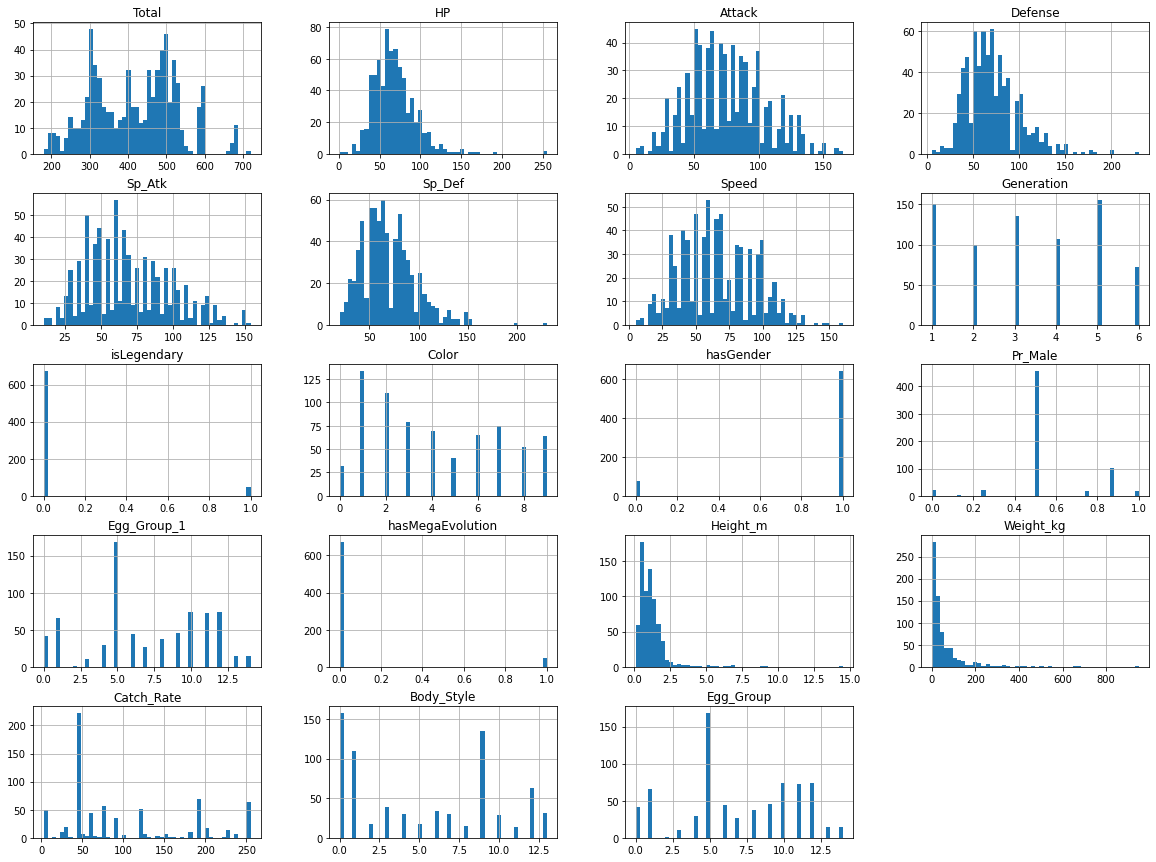

In [70]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [71]:
corr_matrix = df.corr()

In [72]:
corr_matrix["Total"].sort_values(ascending=False)

Total               1.000000
Sp_Atk              0.723737
Sp_Def              0.706501
Attack              0.704164
HP                  0.642628
Defense             0.605831
Speed               0.548890
Weight_kg           0.535966
Height_m            0.526813
isLegendary         0.481837
hasMegaEvolution    0.228503
Egg_Group_1         0.169128
Egg_Group           0.169128
Pr_Male             0.113564
Generation          0.092868
Color               0.023801
Body_Style         -0.061686
hasGender          -0.385978
Catch_Rate         -0.738280
Name: Total, dtype: float64

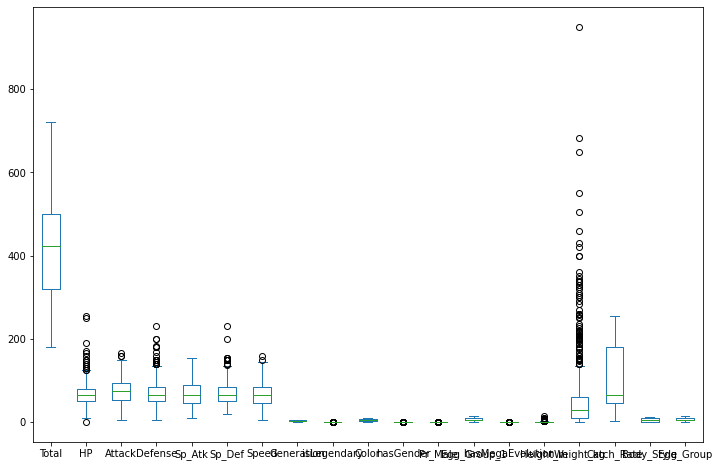

In [73]:
df.plot(kind='box', figsize=(12, 8))
plt.show()